[View in Colaboratory](https://colab.research.google.com/github/AvijitGhosh82/Finance_Graph_Theory/blob/master/Cascading.ipynb)

In [1]:
! rm -rf  Finance_Graph_Theory
! git clone https://github.com/AvijitGhosh82/Finance_Graph_Theory

Cloning into 'Finance_Graph_Theory'...
remote: Counting objects: 161, done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 161 (delta 0), reused 15 (delta 0), pack-reused 144
Receiving objects: 100% (161/161), 137.58 MiB | 64.80 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.facecolor'] ='white'
#plt.rcParams['figure.grid']=False

In [0]:
Graph_data = nx.MultiDiGraph()

Country_matrix14 = pd.read_csv('Finance_Graph_Theory/Aditya/FNA/DataCountry2014.csv')
Country_matrix12 = pd.read_csv('Finance_Graph_Theory/Aditya/FNA/DataCountry2012.csv')
Country_matrix14 = Country_matrix14.set_index('Unnamed: 0')
Country_matrix12 = Country_matrix12.set_index('Unnamed: 0')

Countries = list(Country_matrix14)

In [0]:
gdp_14 = np.diag(Country_matrix14) #GDP is the sum of outputs of each country, not the diag. Just add the output column for each country
gdp_12 = np.diag(Country_matrix12)

normalizing_value = max(gdp_14)

gdp_12_normalized = [x / normalizing_value for x in gdp_12]
gdp_14_normalized = [x / normalizing_value for x in gdp_14]
fraction_gdp_loss = (gdp_12-gdp_14)/gdp_12

GDP_Matrix = Country_matrix14 - np.diag(np.diag(Country_matrix14))

In [0]:
# c = 0.33   #WRONG ASSUMPTION 
column_sum = np.array(sum(np.matrix(GDP_Matrix)))
inverse_column_sum = 1 / column_sum

matrix_inverse_column_sum = np.matrix(np.diag(inverse_column_sum[0]))

C_matrix = np.dot(GDP_Matrix, matrix_inverse_column_sum)

C_hat = (np.array(sum((np.diag(np.ones(len(C_matrix))) - C_matrix))))[0]
C_hat = np.diag(C_hat)

A_matrix = np.dot(C_hat, np.linalg.inv((np.diag(np.ones(len(C_matrix))) - C_matrix)))

matrix_data = pd.DataFrame(A_matrix, index = Countries)
matrix_data.columns = Countries

p = np.matrix(gdp_14_normalized).T

theta=.01

In [0]:
gdp_12_normalized = np.matrix(gdp_12_normalized).T

v_threshold = theta*(np.dot(A_matrix, gdp_12_normalized))

pcurrent = p

n = 44
all_failure_indicator = (np.full((1, n), False)).astype(int)

node_size = list(np.array(np.dot(A_matrix, pcurrent)).T[0])

node_sizes = {}
for i in range(len(node_size)):
    node_sizes[Countries[i]] = node_size[i]

for country in Countries:
    Graph_data.add_node(country)

In [0]:
def print_graph(failed_names):
    color_map = []
    for node in Graph_data:
        if node in failed_names:
            color_map.append('yellow')
            #print (node)
        else :
            color_map.append('red')
    pos = nx.spring_layout(Graph_data) 
    nodes = nx.draw_networkx_nodes(Graph_data, pos, node_size= [v * 10000 for v in node_sizes.values()], node_color = color_map, alpha=0.5) 
    edges = nx.draw_networkx_edges(Graph_data, pos, edge_color='lightgray', arrows=True, width=0.05,)
    nx.draw_networkx_labels(Graph_data,pos,font_size=15)
    nodes.set_edgecolor('gray')
    plt.show()

In [0]:
for country in Countries:
    for country2 in Countries:
        if country != country2:
            Graph_data.add_weighted_edges_from([(country, country2, matrix_data[country][country2])])

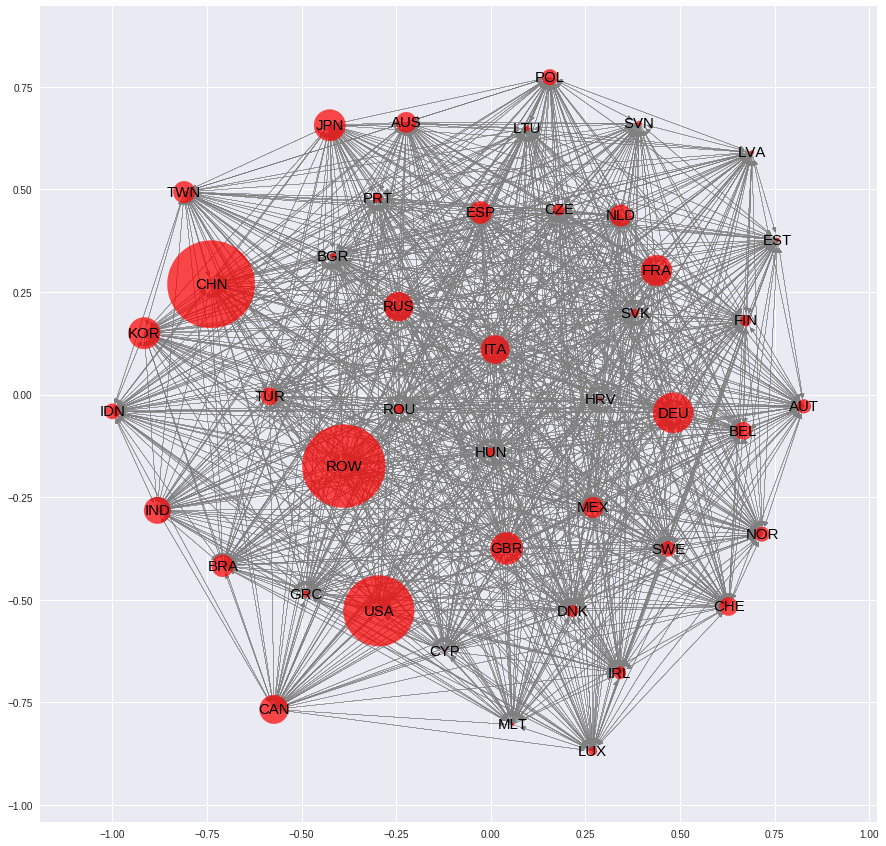

In [0]:
pos = nx.spring_layout(Graph_data) 
nodes = nx.draw_networkx_nodes(Graph_data, pos, node_size= [v * 10000 for v in node_sizes.values()], alpha=0.7) 
edges = nx.draw_networkx_edges(Graph_data, pos, edge_color='gray', arrows=True, width=0.05,)
nx.draw_networkx_labels(Graph_data,pos,font_size=15)
# nodes.set_edgecolor('gray')
plt.show()

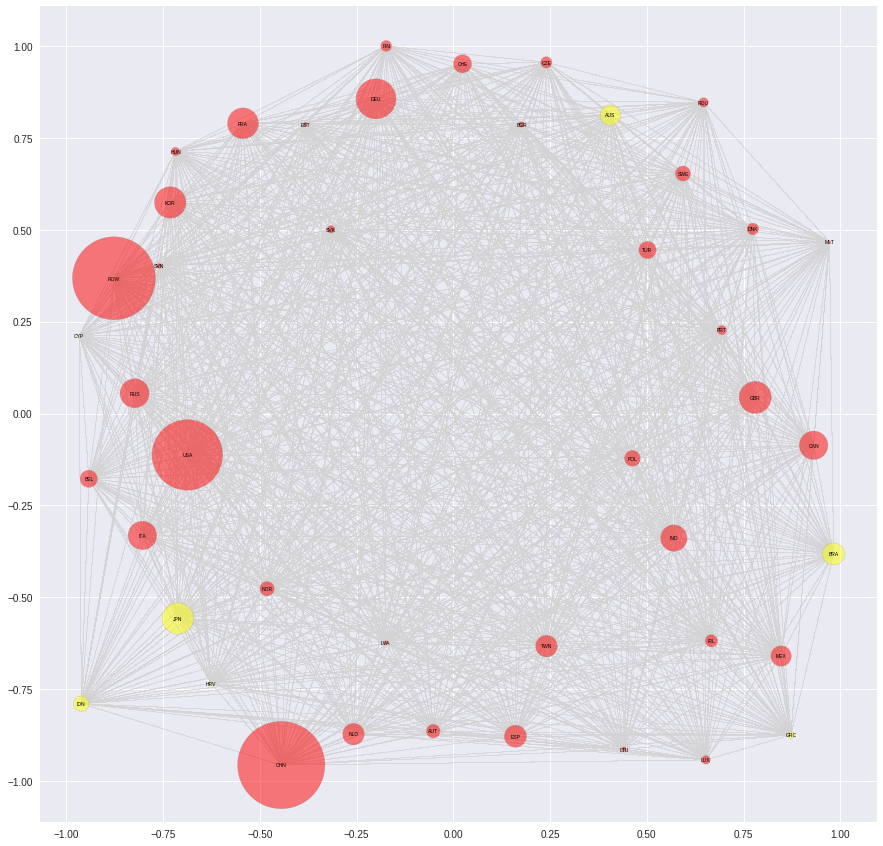

In [0]:
wave = 0
while (wave == 0) or (len(new_failed_names) != 0):
    wave = wave + 1
#     plt.savefig('myfig' + str(wave) + '.png')
    
    new_failure_indicator = (np.array((np.dot(A_matrix, pcurrent).T < v_threshold.T).astype(int)) * ((all_failure_indicator == 0))).T
    all_failure_indicator = all_failure_indicator | new_failure_indicator.T
    pcurrent = pcurrent - np.multiply(new_failure_indicator, v_threshold/2)
    new_failed_countries = np.where(all_failure_indicator[0] == 1)[0]
    a = np.where(new_failure_indicator.T[0] == 1)
    
    node_size = list(np.array(np.dot(A_matrix, pcurrent)).T[0])

    node_sizes = {}
    for i in range(len(node_size)):
        node_sizes[Countries[i]] = node_size[i]
    
    failed_names = []
    
    for x in list(new_failed_countries):
        failed_names.append(Countries[x])
     
    new_failed_names = []
    
    for x in list(a[0]):
        new_failed_names.append(Countries[x])
    print_graph(failed_names)
        
    if (len(new_failed_names) != 0):
        print('Wave', wave, 'failed countries are', new_failed_names)



In [0]:
failed_names

['AUT',
 'CAN',
 'CHE',
 'CHN',
 'CYP',
 'CZE',
 'DNK',
 'ESP',
 'FIN',
 'LUX',
 'LVA',
 'SVN',
 'SWE',
 'USA']